In [11]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
from copy import deepcopy

# Analysis of Original DATA Shape

In [12]:
# Replace the diretory path with "your/path/to/data"
data_dir = './data'
list_of_pkl_files = os.listdir(path=data_dir)
list_of_pkl_files = [f for f in list_of_pkl_files if f.endswith('.pkl')]
list_of_pkl_files.sort()

guess_data_shape = set()

for file_path in list_of_pkl_files:
        # with open("data/rat001_02.gift_ica_0.pkl", "rb") as f:
        with open(os.path.join(data_dir, file_path), "rb") as f:
                var = pickle.load(f)
        guess_data_shape.add((var[0].shape, var[0].dtype, var[1].shape, var[1].dtype, var[2]))

sample = deepcopy(var)
print(f"Different Types #{len(guess_data_shape)}")
print(*guess_data_shape, sep="\n")
print()

print("Data Range of var[0]")
print(np.min(var[0], axis=None))
print(np.max(var[0], axis=None))
print()

print("Data Range of var[1]")
print(np.min(var[1], axis=None))
print(np.max(var[1], axis=None))
print(var[2])

Different Types #2
((64, 64, 20), dtype('float64'), (1, 1178), dtype('float64'), 0)
((64, 64, 20), dtype('float64'), (1, 1178), dtype('float64'), 1)

Data Range of var[0]
-4.283944606781006
6.387252330780029

Data Range of var[1]
-9.875741958618164
5.734953880310059
1


# Analysis of each kind of DATA

In [13]:
# Get the mean value of all pickle
# Image is a matrix of 64*64*20
mean_image = np.zeros((64, 64, 20), dtype=np.float32)
# Time signal is a vector of 1178
mean_time_signal = np.zeros((1, 1178), dtype=np.float32)  
for file_path in list_of_pkl_files:
    with open(os.path.join(data_dir, file_path), "rb") as f:
        var = pickle.load(f)
    mean_image += var[0]
    mean_time_signal += var[1]
mean_image /= len(list_of_pkl_files)
mean_time_signal /= len(list_of_pkl_files)

In [39]:
def image_visualization(image, title=None):
    slices = image.astype(np.float32)
    fig, axes = plt.subplots(4, 5, figsize=(14, 10), constrained_layout=True)
    fig.suptitle(title, fontsize=16)
    # 1️⃣ 对称亮度范围
    abs_max = np.percentile(abs(slices), 99) 
    vmin, vmax = -abs_max, abs_max
    threshold = 0.8 * abs_max            # 80% 双尾显著性

    for i in range(20):
        ax = axes[i//5, i%5]
        img = slices[:, :, i]

        im = ax.imshow(img, cmap='coolwarm', vmin=vmin, vmax=vmax,
                    interpolation='nearest')
        # 2️⃣ 可选：加上显著性等值线
        mask = np.abs(img) >= threshold
        ax.contour(mask, levels=[0.5], colors='black', linewidths=0.5)

        ax.set_title(f"Slice {i+1}", fontsize=9)
        ax.axis('off')

    plt.tight_layout()
    cbar = fig.colorbar(im, ax=axes, shrink=0.6)
    cbar.set_label("z-score", rotation=270, labelpad=15)
    cbar.set_ticks([-abs_max, -threshold, 0, threshold, abs_max])
    # plt.savefig("slices.png", dpi=300, bbox_inches='tight')
    plt.show()

## Image Signal Analysis

/tmp/ipykernel_31911/2632013918.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


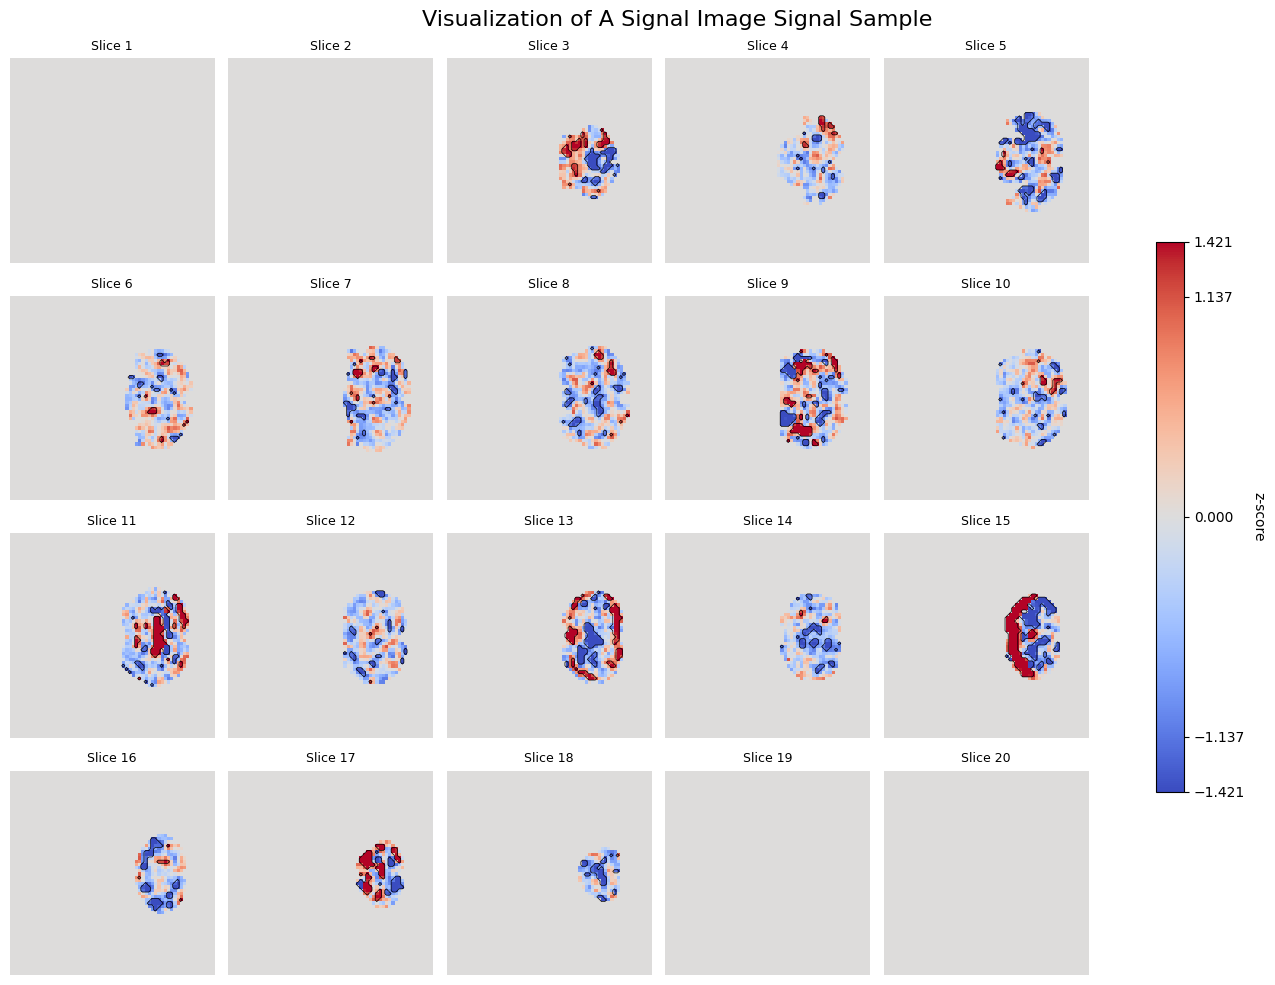

In [40]:
# Draw the image for a single sample
import numpy as np, matplotlib.pyplot as plt
image_visualization(sample[0], title="Visualization of A Signal Image Signal Sample")

/tmp/ipykernel_31911/2632013918.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


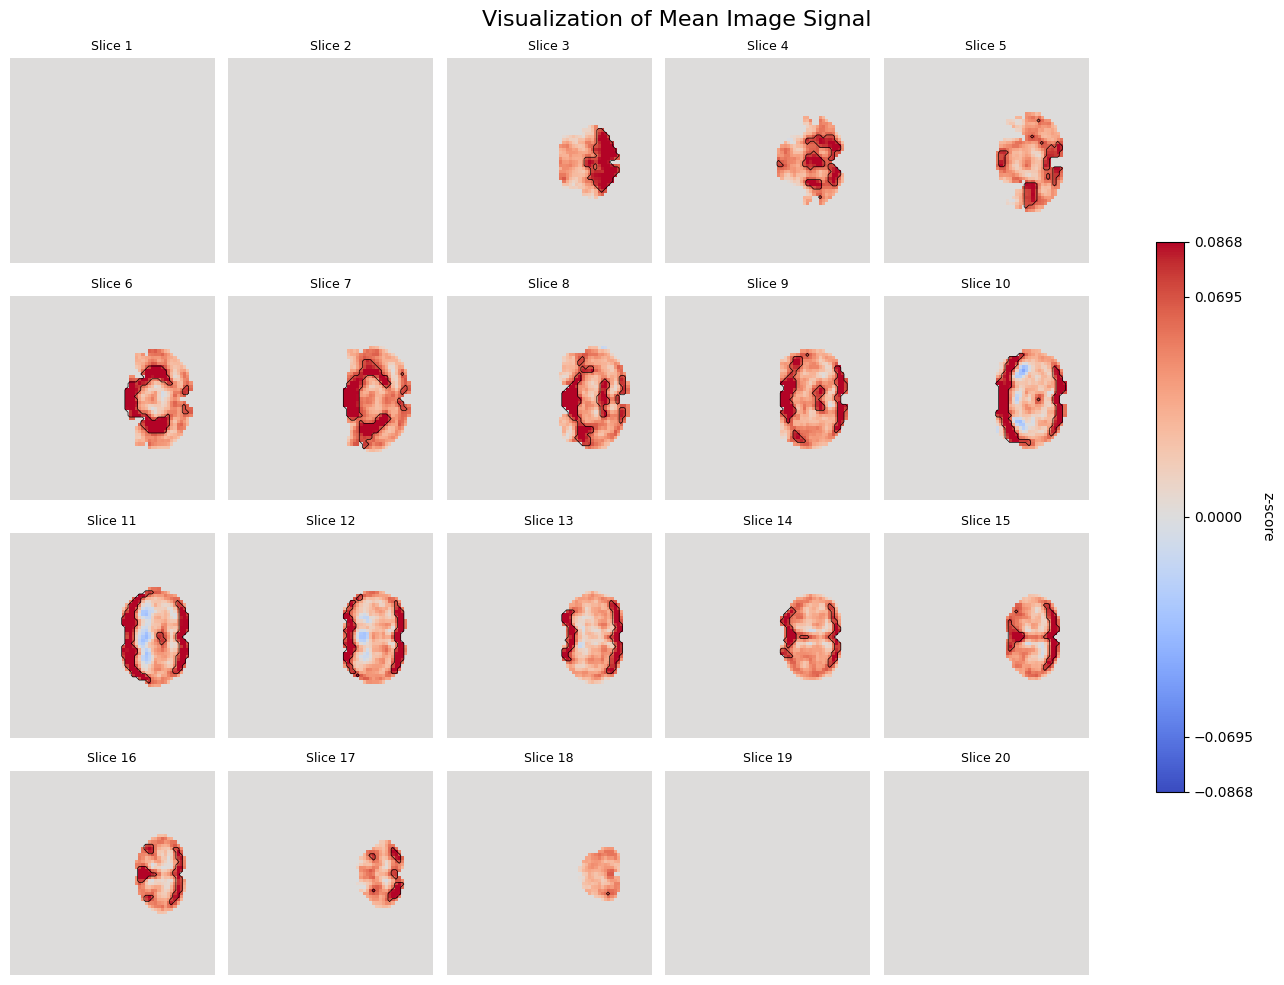

In [41]:
# Draw the image visualization for the mean of the pickle files
image_visualization(mean_image, title="Visualization of Mean Image Signal")

## Time Signal Analysis

In [43]:
def time_visualization(time_signal, title=None):
    plt.figure(figsize=(12, 4))
    plt.plot(time_signal[0], color='blue', linewidth=1.5)
    plt.title(title, fontsize=16)
    plt.xlabel("Time Points", fontsize=14)
    plt.ylabel("Signal Value", fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig("time_signal.png", dpi=300, bbox_inches='tight')
    plt.show()

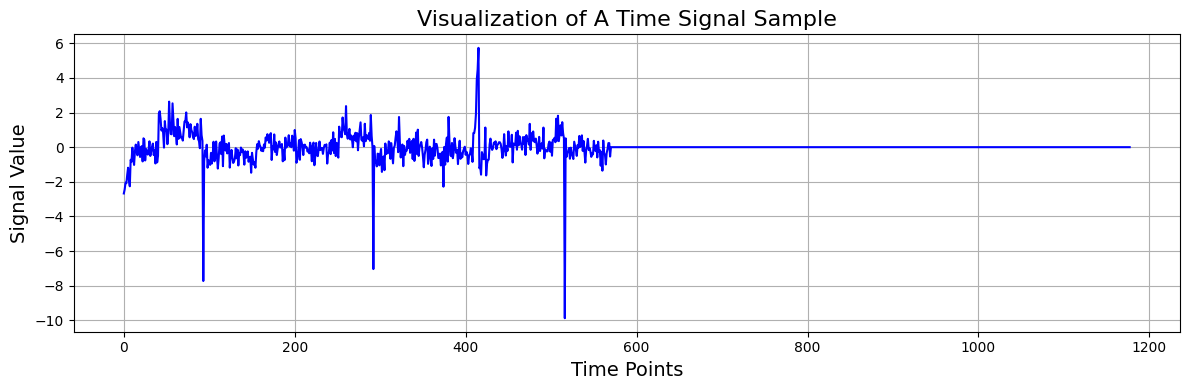

In [44]:
# Draw the time signal for a single sample
time_visualization(sample[1], title="Visualization of A Time Signal Sample")

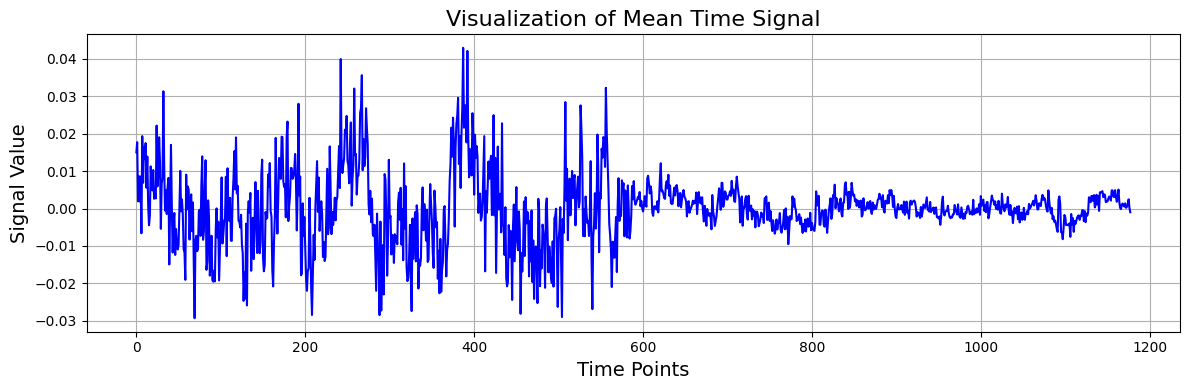

In [45]:
# Draw the time signal for the mean of the pickle files
time_visualization(mean_time_signal, title="Visualization of Mean Time Signal")

Text(0.5, 1.0, 'FFT of Time Course')

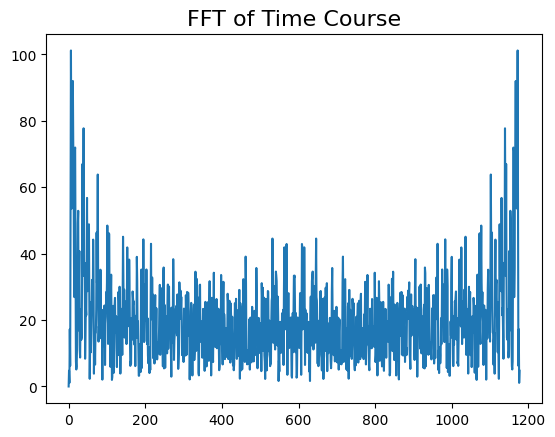

In [46]:
fft_of_timecourse = np.fft.fft(var[1][0,:])
plt.figure()
plt.plot(np.abs(fft_of_timecourse), label="FFT of Time Course")
x_freq = np.fft.fftfreq(len(var[1][0,:]), d=1/1000)  # Assuming a sampling rate of 1000 Hz
plt.title("FFT of Time Course", fontsize=16)


# Analysis of Different Labels

In [50]:
# Extract the image and time signal for each label seperately
correct_num = 0
false_num = 0
correct_var = [np.zeros_like(mean_image), np.zeros_like(mean_time_signal)]
false_var = [np.zeros_like(mean_image), np.zeros_like(mean_time_signal)]
for file_path in list_of_pkl_files:
    with open(os.path.join(data_dir, file_path), "rb") as f:
        var = pickle.load(f)
        if var[2] == 1:
            correct_var[0] += var[0]
            correct_var[1] += var[1]
            correct_num += 1
        else:
            false_var[0] += var[0]
            false_var[1] += var[1]
            false_num += 1
correct_var[0] /= len(list_of_pkl_files)
correct_var[1] /= len(list_of_pkl_files)
false_var[0] /= len(list_of_pkl_files)
false_var[1] /= len(list_of_pkl_files)

In [51]:
correct_num, false_num

(4173, 4377)

/tmp/ipykernel_31911/2632013918.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


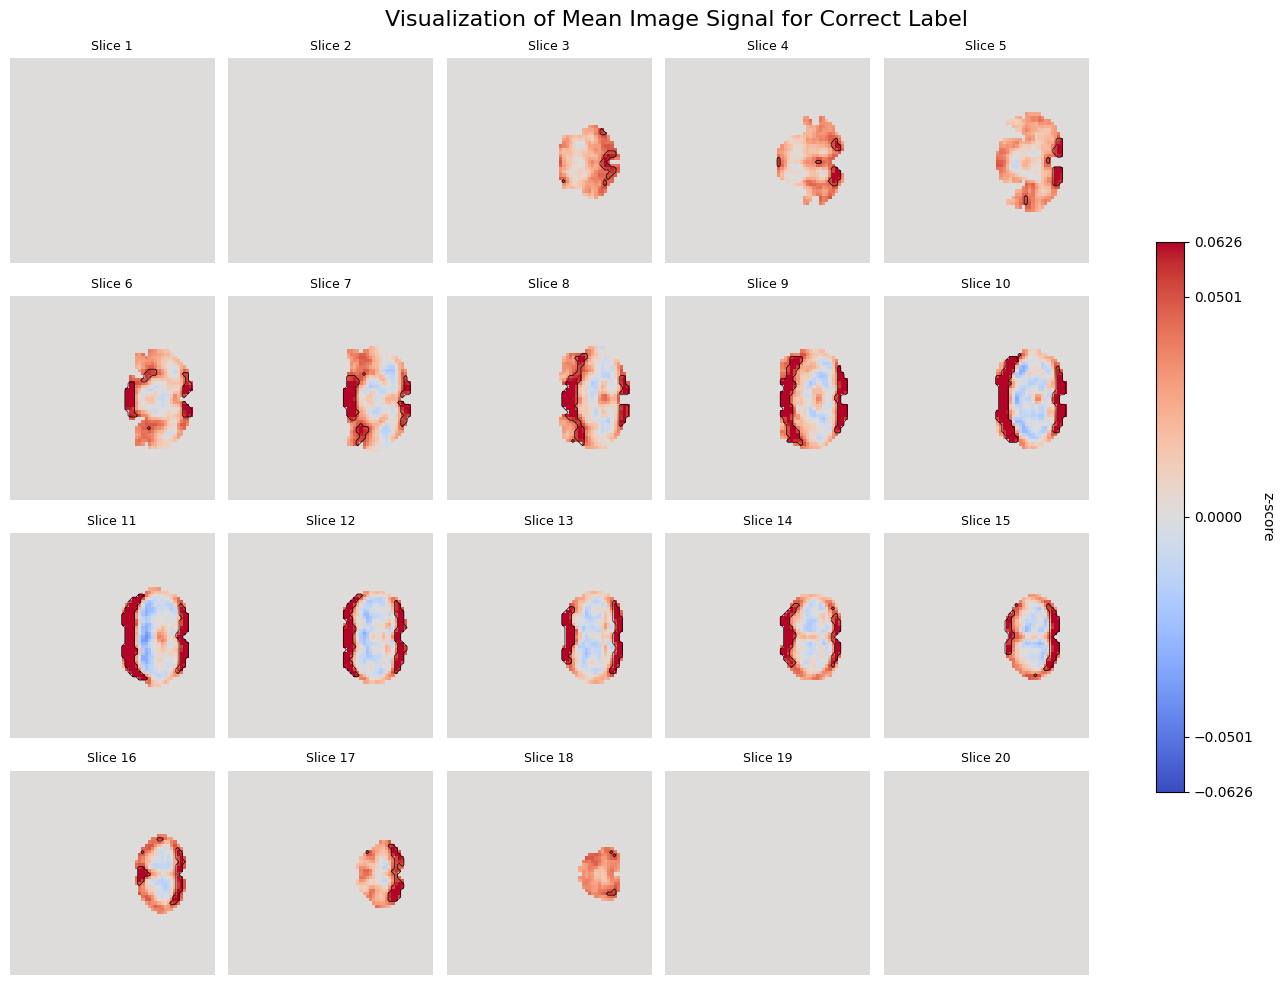

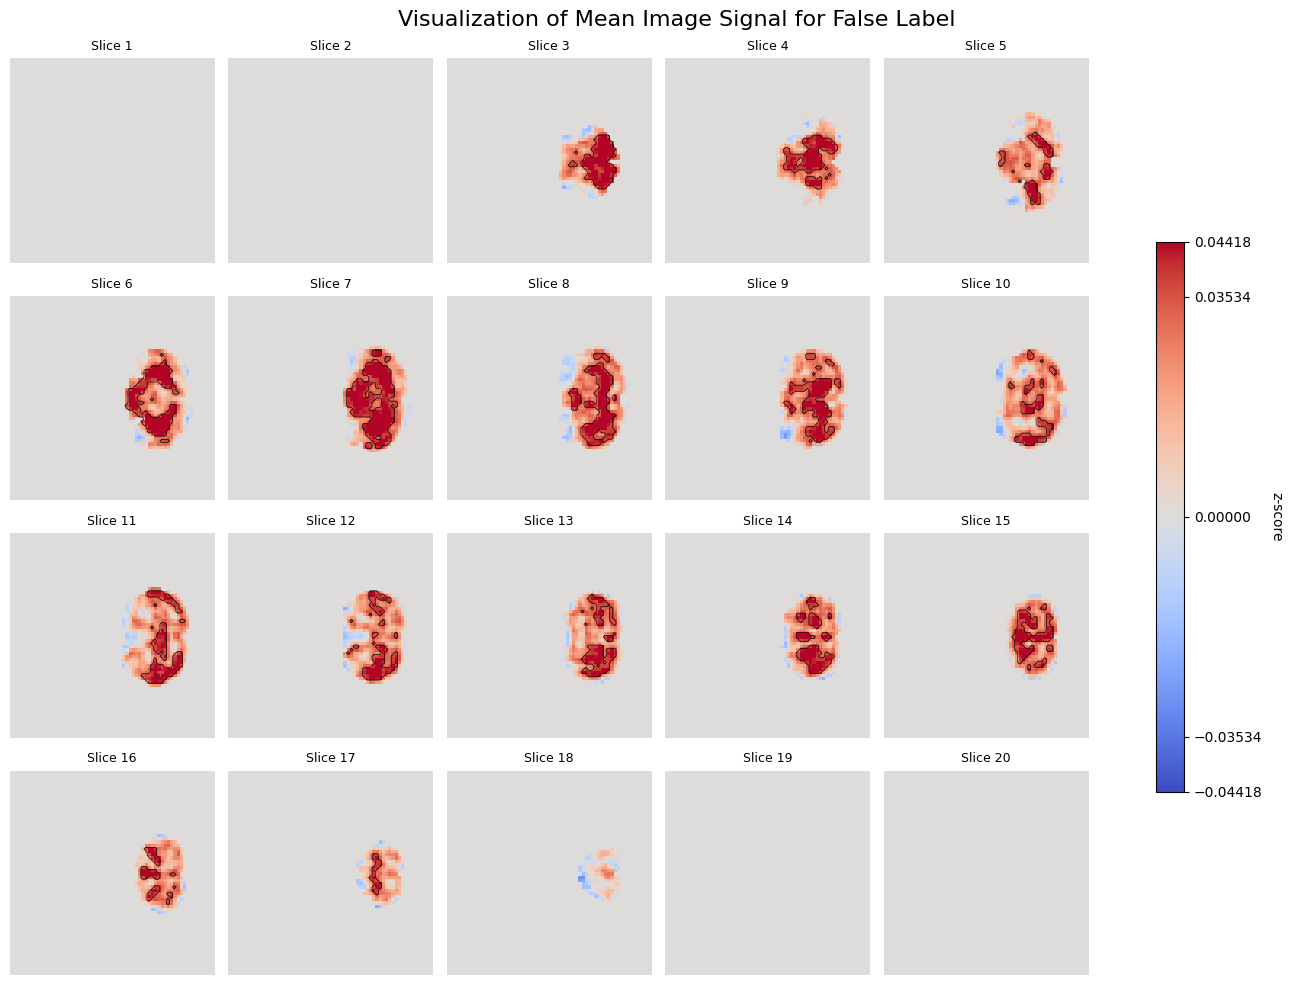

In [52]:
# Draw the mean image and time signal for correct and false labels
image_visualization(correct_var[0], title="Visualization of Mean Image Signal for Correct Label")
image_visualization(false_var[0], title="Visualization of Mean Image Signal for False Label")

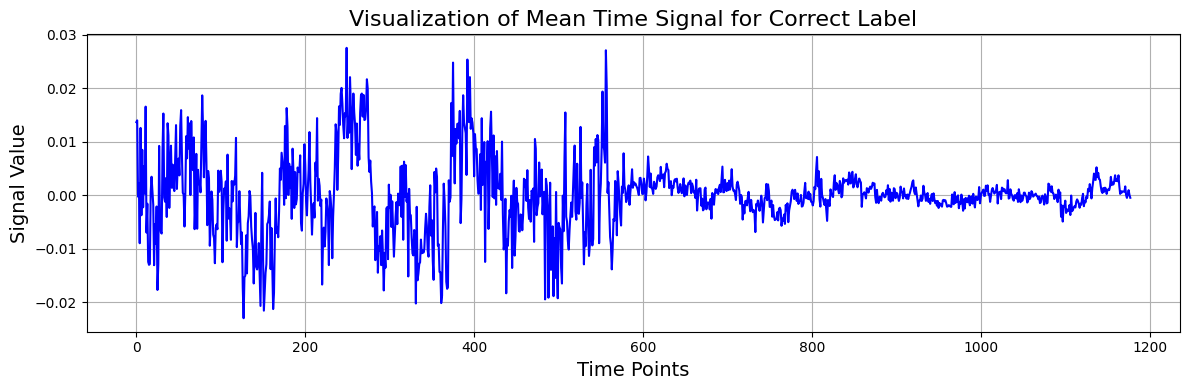

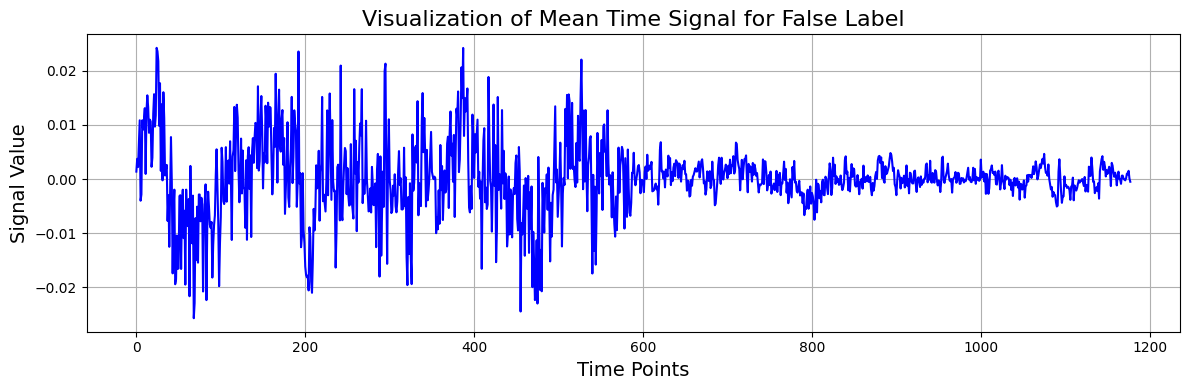

In [53]:
# Draw the mean time signal for correct and false labels
time_visualization(correct_var[1], title="Visualization of Mean Time Signal for Correct Label")
time_visualization(false_var[1], title="Visualization of Mean Time Signal for False Label")